[[ 3.85681819e+02 -4.48352882e-02]
 [-4.48352882e-02  6.61190865e-06]]
427.8964788125523
0.0037961547123687395
0.8460317632296532


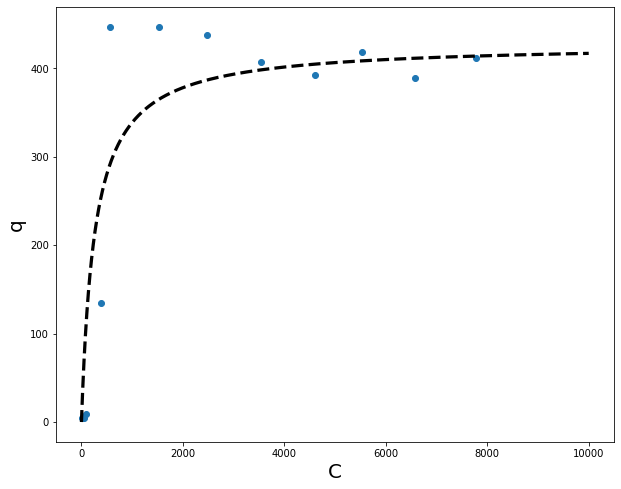

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x_arr = np.array([5.58881, 49.76373, 89.22, 379.62511, 564.39914, 1536.38667, 2479.68605, 3537.7075, 4611.62037, 5533.69632, 6585.26799, 7786.07587])
y_arr = np.array([4.77128, 4.56904, 8.81, 135.08863, 447.0853, 447.03727, 437.6108, 407.37395, 392.94452, 418.32015, 388.9, 412.14781])
sd_y_arr = np.array([1.0766, 0.8178, 1.1496, 18.7116, 1.0144, 9.0365, 33.3791, 34.6899, 43.521, 32.2028, 34.6558, 4.1247])

from scipy.optimize import curve_fit

def Gauss4(x, A, B):
    y = (A*B*x)/(1+B*x)
    return y

parameters, covariance = curve_fit(Gauss4, x_arr, y_arr, sigma=1/sd_y_arr**2, p0=np.array([2000, 0.01]))
print(covariance)
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

y_fit = (fit_A * fit_B * x_arr) / (1 + fit_B * x_arr)

ss_res = np.sum((y_arr - y_fit)**2)
ss_tot = np.sum((y_arr - np.mean(y_arr)) ** 2 )
r_square = 1 - (ss_res/ss_tot)
print(r_square)
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.set_ylabel(r'q', fontsize=20)
ax1.set_xlabel(r'C', fontsize=20)
#r'$10^{{{}}}$'.format(-i)
x_span = np.linspace(0.0, 10000, num=10000)
plt.scatter(x_arr, y_arr)
plt.plot(x_span, (fit_A * fit_B * x_span) / (1 + fit_B * x_span), color='black', linestyle='dashed', linewidth=1.8*1.8)    

plt.show()